# Anomaly Detection

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('../data/mitbih_train_binarytarget.csv', header=None)

In [22]:
#delete first col -> index is in first col
df = df.iloc[:,1:]
df

,1,2,3,4,5,6,7,8,9,10,...,179,180,181,182,183,184,185,186,187,188
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True


Los datos positivos se consideran anormales, por esta razón vamos a entrenar solamente con el target == False.

In [23]:
# separate true and false
df_true = df[df[188] == 1]
df_false = df[df[188] == 0]

In [24]:
# train test split
x= df_false.iloc[:, :-1]
y= df_false.iloc[:, -1]
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=73)

In [25]:
#flatten data 
x_train_flat = x_train.values.flatten()

Text(0.5, 1.0, 'Flattened data')

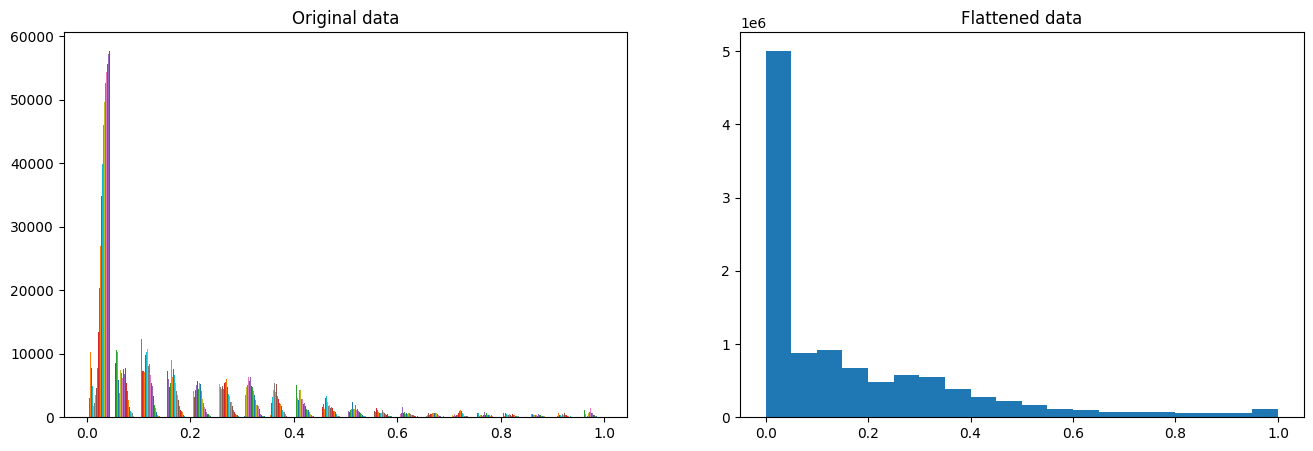

In [26]:
#plot data (after and before flatten)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
ax[0].hist(x_train, bins=20)
ax[0].set_title('Original data')
ax[1].hist(x_train_flat, bins=20)
ax[1].set_title('Flattened data')

La base de datos contiene muchos datos que son 0, estos no aportan nada, realmente debe ser un imputation que se hizo a la databse. Procedemos a eliminar los zeros.

In [27]:
# filter zeros
x_train_flat = x_train_flat[x_train_flat != 0]

Text(0.5, 1.0, 'Boxplot')

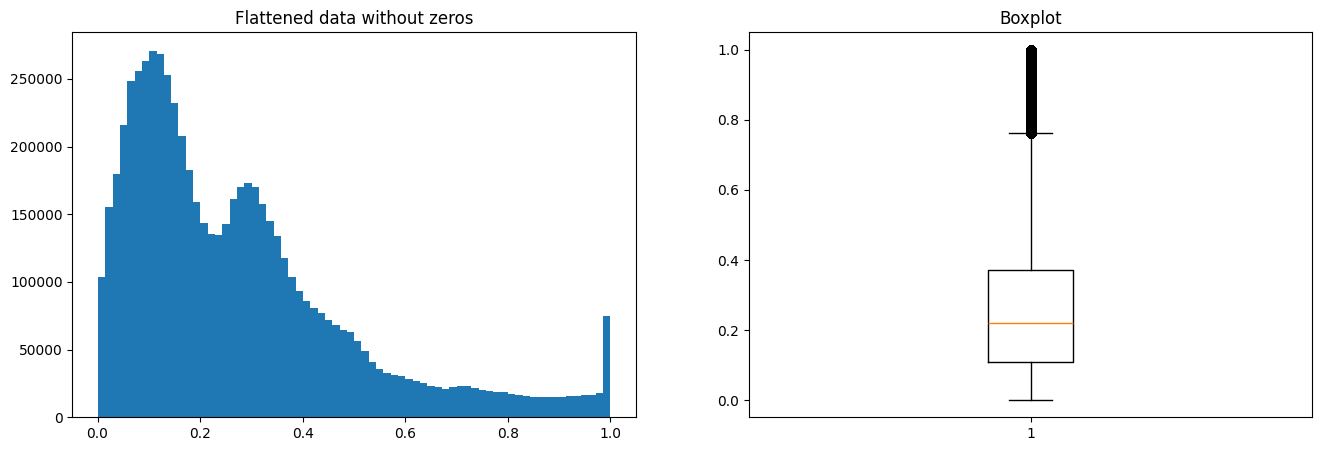

In [28]:
#plot data (after and before flatten)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
ax[0].hist(x_train_flat, bins=70)
ax[0].set_title('Flattened data without zeros')
ax[1].boxplot(x_train_flat)
ax[1].set_title('Boxplot')

A estos datos ya podemos encontrar los cuartiles.

<img src="../resources/Boxplot-WebG.png" alt="Boxplot" width="500"/>

In [36]:
# calculate interquartile range
q1 = np.percentile(x_train_flat, 25)
q3 = np.percentile(x_train_flat, 75)
iqr = q3 - q1

print('Q1:', q1)
print('Q3:', q3)
print('IQR:', iqr)

Q1: 0.1097308471798896
Q3: 0.3706896603107452
IQR: 0.26095881313085556


Si definimos un alfa para calcular el cuantil, podemos manejar los rangos:

In [37]:
alpha = 0.05
q1 = np.quantile(x_train_flat, alpha/2)
q3 = np.quantile(x_train_flat, 1-alpha/2)
iqr = q3 - q1
print('Q1:', q1)
print('Q3:', q3)
print('IQR:', iqr)

Q1: 0.0205882359296083
Q3: 0.9132947921752927
IQR: 0.8927065562456844


Ahora podemos detectar cuales son los datos que estan por fuera del rango intercuartilico. Lo normal sería lo que está aquí:

Text(0.5, 1.0, 'Probability of being between [0.0205882359296083,0.9132947921752927] is 0.8927065562456844')

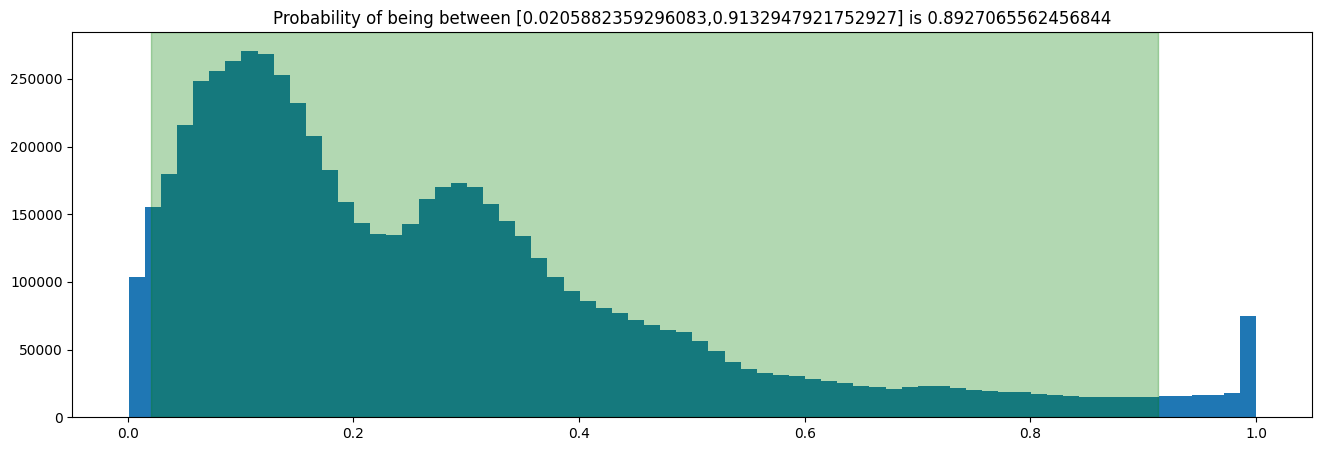

In [40]:
#plot data showing IQR area with axspan
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5))
ax.hist(x_train_flat, bins=70)
ax.axvspan(xmin=q1, xmax=q3, color='green', alpha=0.3)
ax.set_title(f'Probability of being between [{q1},{q3}] is {iqr}')


Todo lo que no esté dentro del rango intercuartilico es anormal.